In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [2]:
from pycaret.regression import *

In [3]:
s = setup(data, target = 'charges', session_id = 123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2541.5527,2.016040e+07,4490.0337,0.8796,0.4380,0.3132
1,3094.6174,3.141311e+07,5604.7404,0.8174,0.4499,0.2942
2,2621.7145,2.205842e+07,4696.6392,0.7207,0.4730,0.3151
3,2832.1913,2.088904e+07,4570.4534,0.8256,0.4640,0.3761
4,2843.1877,2.663500e+07,5160.9105,0.8019,0.4938,0.3242
5,2604.7492,1.952425e+07,4418.6254,0.8744,0.3446,0.2446
6,2411.7493,1.893597e+07,4351.5480,0.8712,0.3574,0.2808
7,2760.3791,2.586744e+07,5086.0041,0.8578,0.4421,0.2784
8,2368.5776,1.845341e+07,4295.7433,0.8808,0.3976,0.3104
9,2929.5884,2.696036e+07,5192.3368,0.8263,0.5322,0.3844


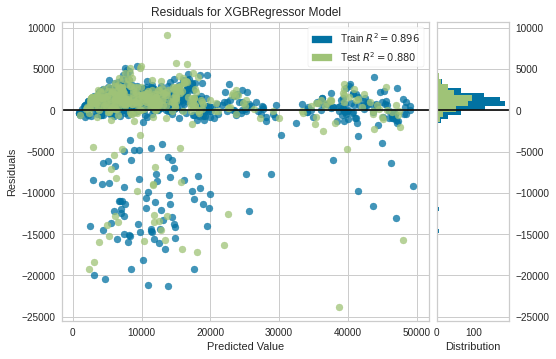

In [5]:
plot_model(xgboost)

# Experiment 2

In [6]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
s2[0].columns

Index(['age_Power2', 'bmi_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'bmi_Power2_multiply_smoker_no',
       'children_1_multiply_bmi_Power2',
       'region_northwest_multiply_bmi_Power2', 'age_Power2_multiply_smoker_no',
       'smoker_no_multiply_children_0', 'bmi_Power2_multiply_sex_female',
       'region_southwest_multiply_smoker_no', 'sex_female_multiply_age_Power2',
       'region_southeast_multiply_bmi_Power2',
       'bmi_Power2_multiply_age_Power2', 'children_0_multiply_age_Power2',
       'sex_female_multiply

In [8]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2630.5399,2.097048e+07,4579.3534,0.8747,0.4388,0.3168
1,3022.3559,3.174483e+07,5634.2551,0.8154,0.4580,0.2965
2,2970.8640,2.737703e+07,5232.3066,0.6534,0.5596,0.4295
3,2949.0576,2.146211e+07,4632.7219,0.8208,0.4851,0.4272
4,3074.8491,2.763435e+07,5256.8385,0.7945,0.4882,0.3276
5,2749.6324,2.071845e+07,4551.7523,0.8667,0.3598,0.2607
6,2428.6447,1.960075e+07,4427.2737,0.8666,0.3652,0.2825
7,2948.6779,2.831164e+07,5320.8685,0.8443,0.4657,0.2971
8,2589.7166,2.291337e+07,4786.7911,0.8520,0.4272,0.3271
9,2780.6200,2.610531e+07,5109.3358,0.8319,0.5368,0.3865


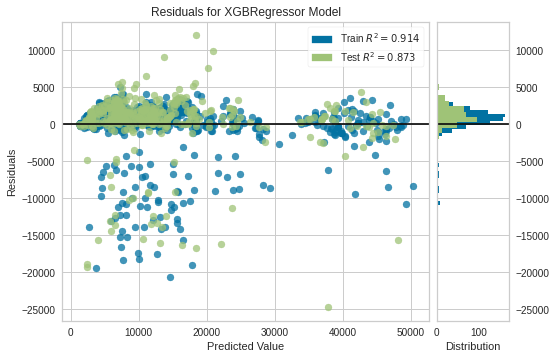

In [9]:
plot_model(xgboost)

In [11]:
save_model(xgboost, 'deployment_26062020')

Transformation Pipeline and Model Succesfully Saved


In [12]:
deployment_26062020 = load_model('deployment_26062020')

Transformation Pipeline and Model Sucessfully Loaded


In [13]:
deployment_26062020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [14]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())

75714.0
